In [5]:
!git clone https://github.com/faeiqkhan/Model_data.git

fatal: destination path 'Model_data' already exists and is not an empty directory.


In [6]:
!ls /home/anonymous/Desktop/sdc_model/Behaviorall_Cloning/Model_data/Data

driving_log.csv  IMG


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
import ntpath
import random
#import google.colab
#from google.colab import drive

In [8]:
datadir = '/home/anonymous/Desktop/sdc_model/Behaviorall_Cloning/Model_data/Data'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names=columns)
pd.set_option('display.max_colwidth', 1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\faeiqkhan\Desktop\data\IMG\center_2024_11_02_14_33_44_019.jpg,C:\Users\faeiqkhan\Desktop\data\IMG\left_2024_11_02_14_33_44_019.jpg,C:\Users\faeiqkhan\Desktop\data\IMG\right_2024_11_02_14_33_44_019.jpg,0.0,0.0,0.0,0.000078
1,C:\Users\faeiqkhan\Desktop\data\IMG\center_2024_11_02_14_33_44_119.jpg,C:\Users\faeiqkhan\Desktop\data\IMG\left_2024_11_02_14_33_44_119.jpg,C:\Users\faeiqkhan\Desktop\data\IMG\right_2024_11_02_14_33_44_119.jpg,0.0,0.0,0.0,0.000079
2,C:\Users\faeiqkhan\Desktop\data\IMG\center_2024_11_02_14_33_44_223.jpg,C:\Users\faeiqkhan\Desktop\data\IMG\left_2024_11_02_14_33_44_223.jpg,C:\Users\faeiqkhan\Desktop\data\IMG\right_2024_11_02_14_33_44_223.jpg,0.0,0.0,0.0,0.000078
3,C:\Users\faeiqkhan\Desktop\data\IMG\center_2024_11_02_14_33_44_324.jpg,C:\Users\faeiqkhan\Desktop\data\IMG\left_2024_11_02_14_33_44_324.jpg,C:\Users\faeiqkhan\Desktop\data\IMG\right_2024_11_02_14_33_44_324.jpg,0.0,0.0,0.0,0.000079
4,C:\Users\faeiqkhan\Desktop\data\IMG\center_2024_11_02_14_33_44_426.jpg,C:\Users\faeiqkhan\Desktop\data\IMG\left_2024_11_02_14_33_44_426.jpg,C:\Users\faeiqkhan\Desktop\data\IMG\right_2024_11_02_14_33_44_426.jpg,0.0,0.0,0.0,0.000079


In [9]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail;

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2024_11_02_14_33_44_019.jpg,left_2024_11_02_14_33_44_019.jpg,right_2024_11_02_14_33_44_019.jpg,0.0,0.0,0.0,0.000078
1,center_2024_11_02_14_33_44_119.jpg,left_2024_11_02_14_33_44_119.jpg,right_2024_11_02_14_33_44_119.jpg,0.0,0.0,0.0,0.000079
2,center_2024_11_02_14_33_44_223.jpg,left_2024_11_02_14_33_44_223.jpg,right_2024_11_02_14_33_44_223.jpg,0.0,0.0,0.0,0.000078
3,center_2024_11_02_14_33_44_324.jpg,left_2024_11_02_14_33_44_324.jpg,right_2024_11_02_14_33_44_324.jpg,0.0,0.0,0.0,0.000079
4,center_2024_11_02_14_33_44_426.jpg,left_2024_11_02_14_33_44_426.jpg,right_2024_11_02_14_33_44_426.jpg,0.0,0.0,0.0,0.000079


([<matplotlib.lines.Line2D at 0x7a48480aa3f0>], (200, 200))

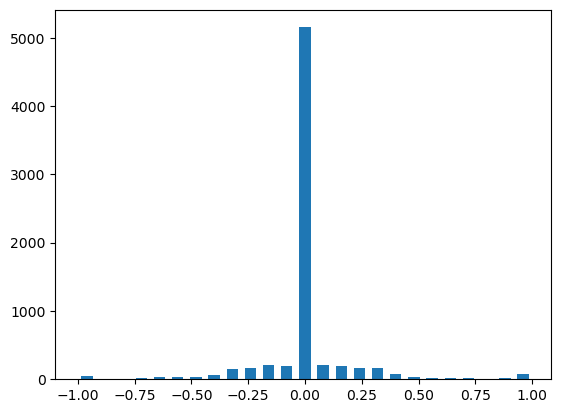

In [10]:
num_bins = 25
samples_per_bin = 200
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot(np.min(data['steering']), np.max(data['steering'])),(samples_per_bin,samples_per_bin)

In [24]:
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(data['steering'])):
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
            list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_);


print(remove_list)
data.drop(data.index[remove_list], inplace=True)
print(len(data))

hist , _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot(np.min(data['steering']), np.max(data['steering'])),(samples_per_bin,samples_per_bin)

KeyError: 0

In [12]:
print(data.iloc[1])
def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

image_paths , steerings = load_img_steering(datadir+'/IMG',data)

center      center_2024_11_02_14_33_46_361.jpg
left        left_2024_11_02_14_33_46_361.jpg  
right       right_2024_11_02_14_33_46_361.jpg 
steering   -0.570022                          
throttle    1.0                               
reverse     0.0                               
speed       4.174972                          
Name: 23, dtype: object


/tmp/ipykernel_10697/1848343505.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
/tmp/ipykernel_10697/1848343505.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(indexed_data[3]))


In [13]:
X_train, X_valid, y_train, y_valid=train_test_split(image_paths,steerings, test_size=0.2,random_state=6)
print('Training Samples: {}\nValidation Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 1728
Validation Samples: 432


Text(0.5, 1.0, 'Validation set')

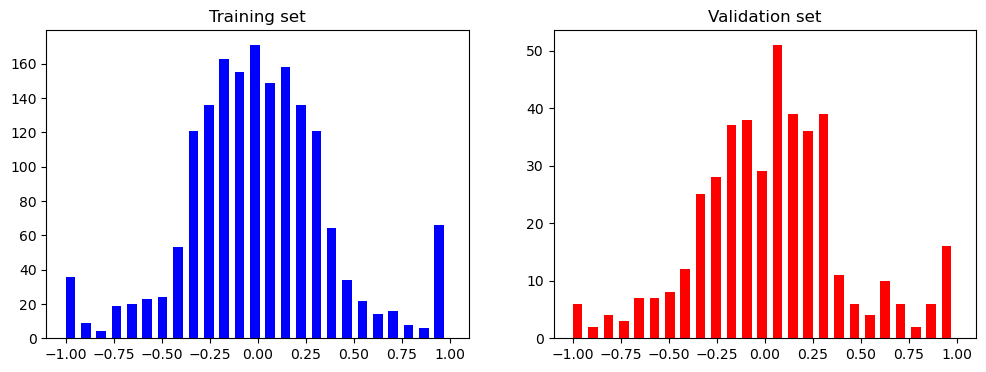

In [14]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set') 
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [15]:
def img_preprocess(img):
    img=mpimg.imread(img)
    # img = np.asarray(img)
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

Text(0.5, 1.0, 'Processed Image')

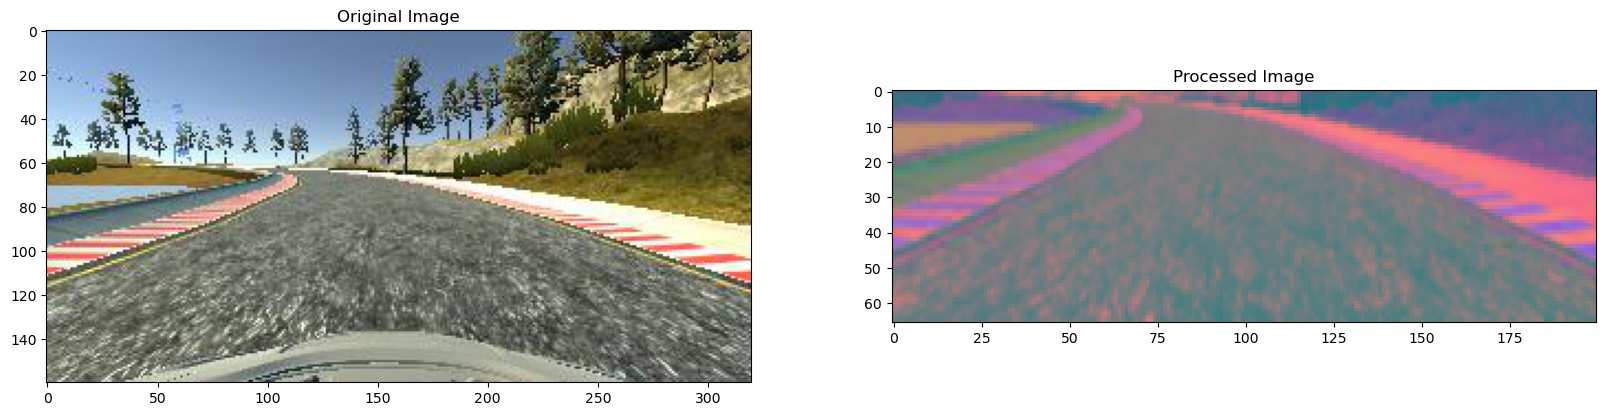

In [16]:
image = image_paths[100]
original_image = mpimg.imread(image)
processed_image = img_preprocess(image)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(original_image)
ax1.set_title('Original Image')
ax2.imshow(processed_image) 
ax2.set_title('Processed Image')

In [17]:
X_train= np.array(list(map(img_preprocess,X_train)))
X_valid= np.array(list(map(img_preprocess,X_valid)))

(1728, 66, 200, 3)


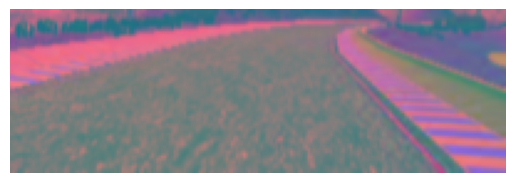

In [18]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

In [19]:
def nvidia_model():
 
    model = Sequential()
 
    model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66,200,3),activation='relu'))
 
    model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
    model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
    model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
    model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
    model.add(Dropout(0.5))
    
    
    model.add(Flatten())
    model.add(Dense(100, activation='elu'))
    model.add(Dropout(0.5))
    
    
    model.add(Dense(50, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation ='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    
    
    optimizer= Adam(1e-3)
    model.compile(loss='mse', optimizer=optimizer)
    
    return model   

In [20]:
model= nvidia_model()
model.summary()

/home/anonymous/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 31, 98, 24)     │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 47, 36)     │        21,636 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 22, 48)      │        43,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 20, 64)      │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 1, 18, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 18, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       115,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,219 (985.23 KB)

 Trainable params: 252,219 (985.23 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid),batch_size=100,verbose=1, shuffle=1)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.3631 - val_loss: 0.1508
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.1516 - val_loss: 0.1495
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.1461 - val_loss: 0.1451
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.1304 - val_loss: 0.1409
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.1374 - val_loss: 0.1216
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.1224 - val_loss: 0.1187
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.1245 - val_loss: 0.1172
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.1243 - val_loss: 0.1135
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.1182 - val_loss: 0.0960
Epoch 10/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.1189 - val_loss: 0.1049
Epoch 11/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.1042 - val_loss: 0.1177
Epoch 12/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step

Text(0.5, 0, 'epoch')

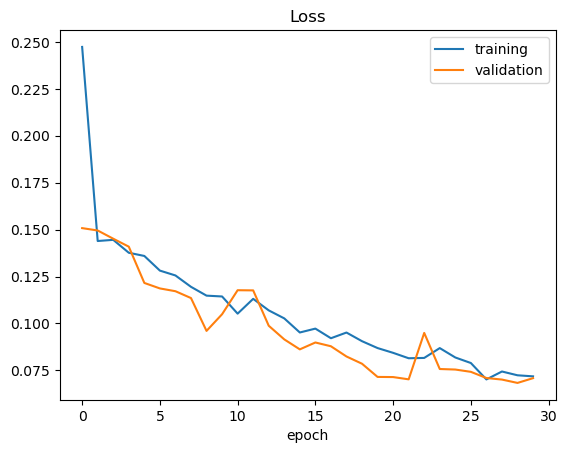

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation']) 
plt.title('Loss')
plt.xlabel('epoch')

In [23]:
#model.save('model.h5')
model.save('my_model.keras.h5')